## Arbol de decisión

In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

In [251]:
# Cargar el dataset
df = pd.read_csv(r'C:\Users\Miguel Quecan\Desktop\arboles de decision\winequality-red.csv')

# Mostrar las primeras filas del dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


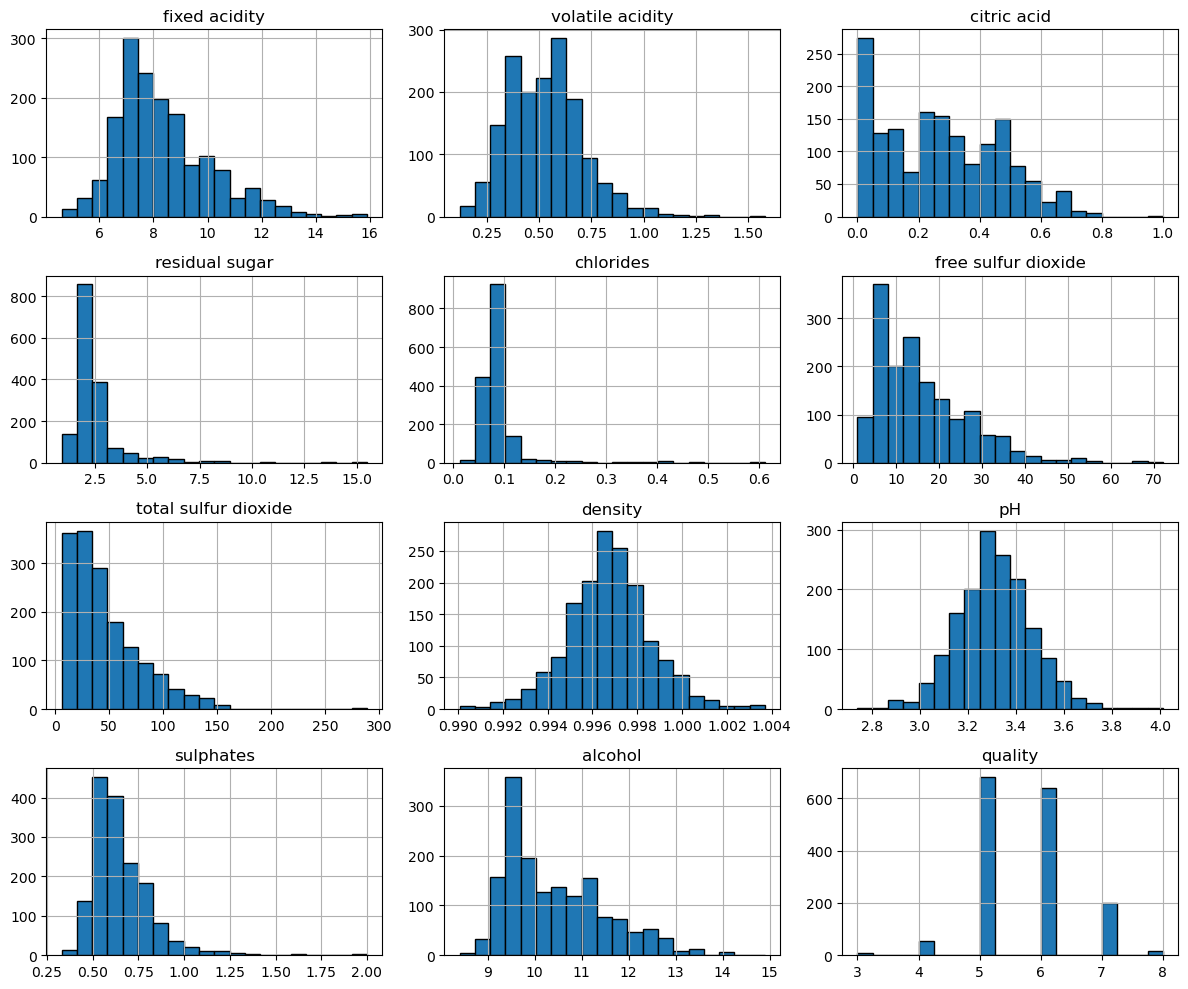

In [253]:
# Resumen estadístico
df.describe()

# Histograma
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


## Identificar valores atípicos:

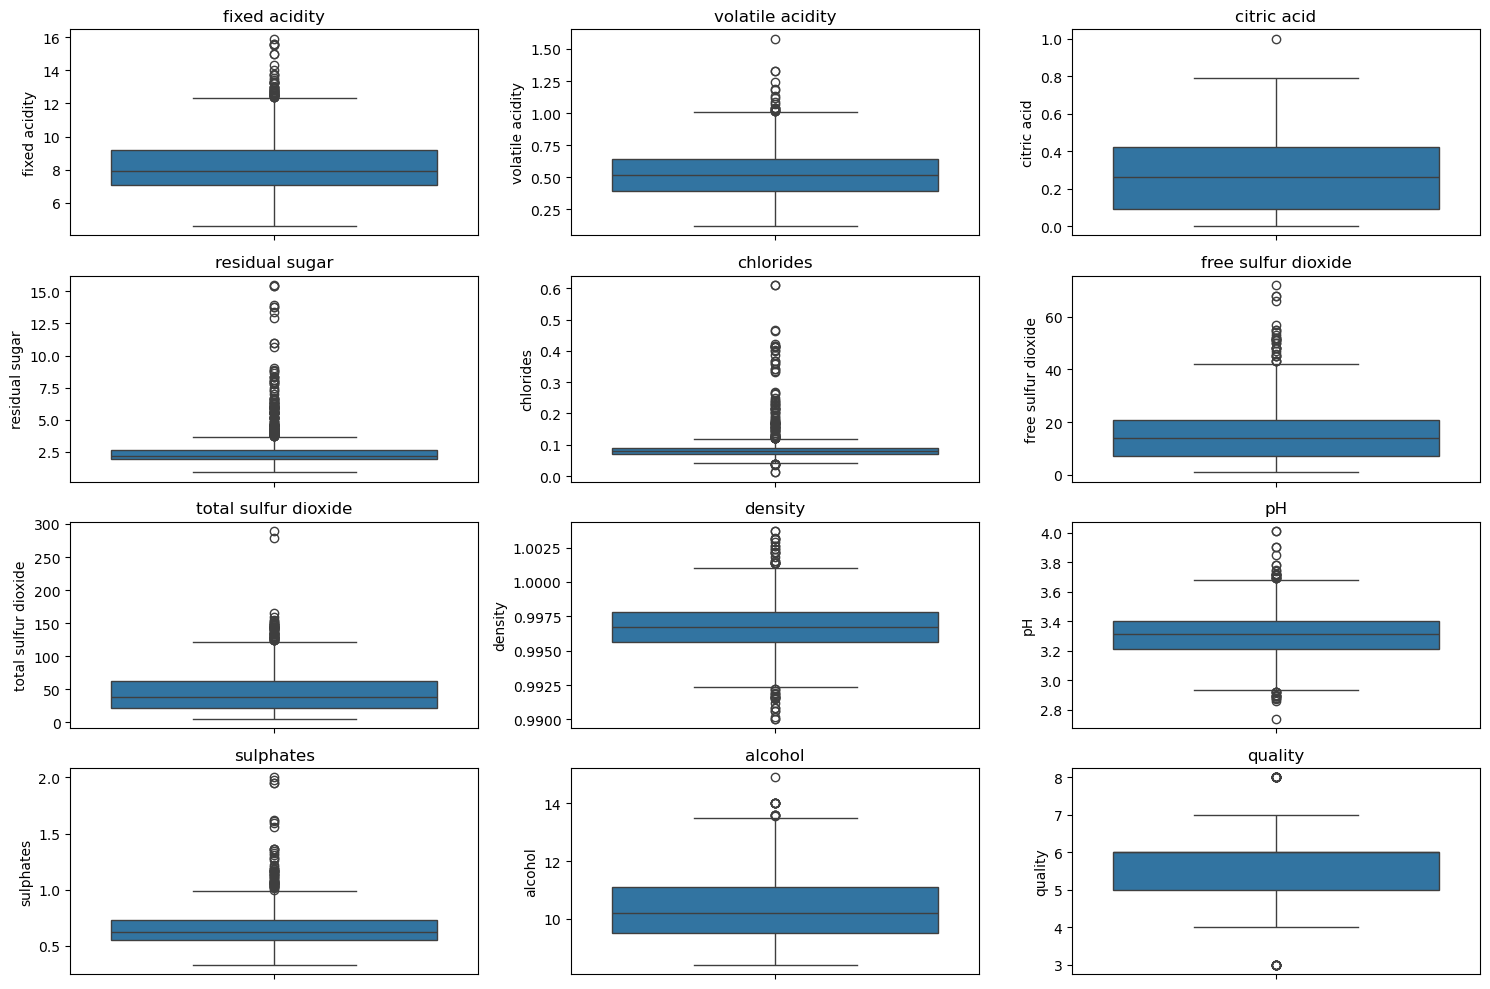

In [255]:
# Boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


## Matriz de correlación

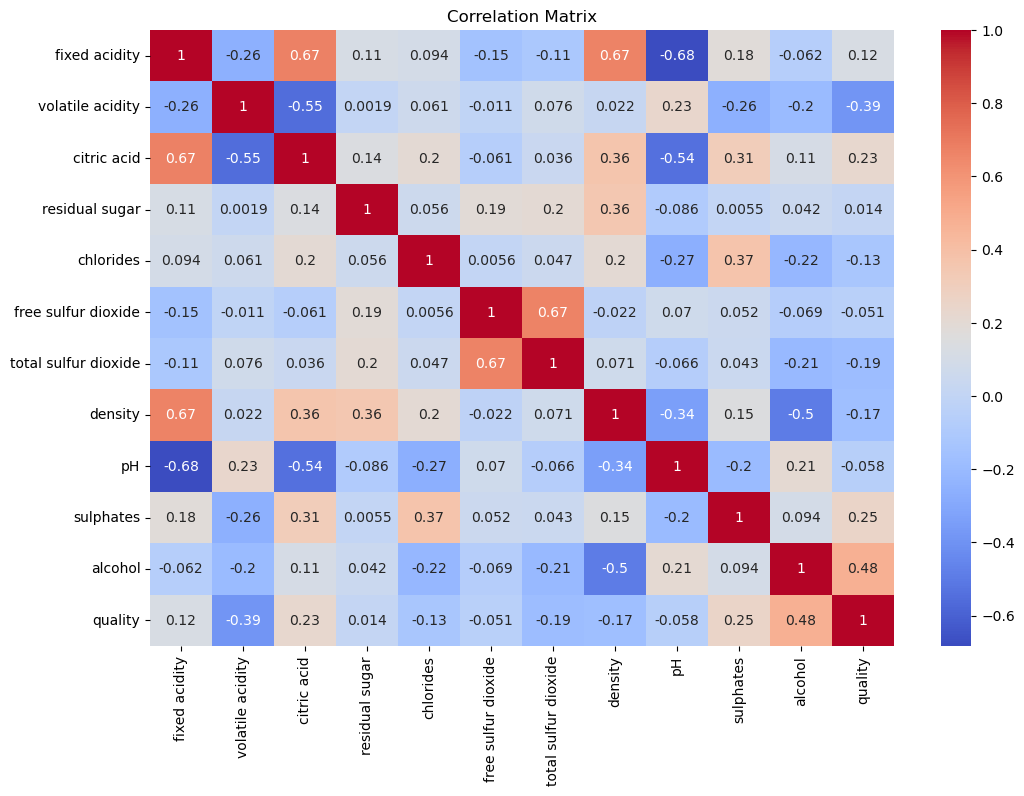

In [258]:
# Matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Tratamiento de valores faltantes y eliminación de valores atípicos:

In [262]:
# Verificar valores faltantes
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [264]:
# Eliminar valores atípicos
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar el dataset limpio
df_cleaned.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [266]:
# Escalado de características
scaler = StandardScaler()
features = df_cleaned.drop('quality', axis=1)
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame con las características escaladas
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['quality'] = df_cleaned['quality'].values

# Mostrar el dataset escalado
df_scaled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764,5
1,-0.248346,2.174284,-1.375744,0.940570,1.356569,1.135446,0.947754,0.135771,-0.946440,0.419963,-0.571630,5
2,-0.248346,1.443297,-1.152735,0.259965,0.937312,-0.002316,0.449581,0.261343,-0.490773,0.161451,-0.571630,5
3,2.084173,-1.480652,1.746386,-0.647508,-0.250582,0.225236,0.679507,0.889206,-1.250217,-0.441743,-0.571630,6
4,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764,5


In [268]:
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X_scaled, y)

# Mostrar las características seleccionadas
selected_features = selector.get_support(indices=True)
selected_features_names = [X.columns[i] for i in selected_features]
selected_features_names


['volatile acidity', 'total sulfur dioxide', 'alcohol']

##  Dataset en Train y Test

In [271]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)


In [273]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## Desempeño del Modelo

In [276]:
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))


Matriz de Confusión:
[[ 0  0  1  1  0  0]
 [ 0  4  6  1  0  0]
 [ 0  7 95 33  1  0]
 [ 0  5 32 75 13  3]
 [ 0  2  4  9 22  3]
 [ 0  0  0  1  1  1]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.22      0.36      0.28        11
           5       0.69      0.70      0.69       136
           6       0.62      0.59      0.60       128
           7       0.59      0.55      0.57        40
           8       0.14      0.33      0.20         3

    accuracy                           0.62       320
   macro avg       0.38      0.42      0.39       320
weighted avg       0.63      0.62      0.62       320



## Gráficas de Resultados 

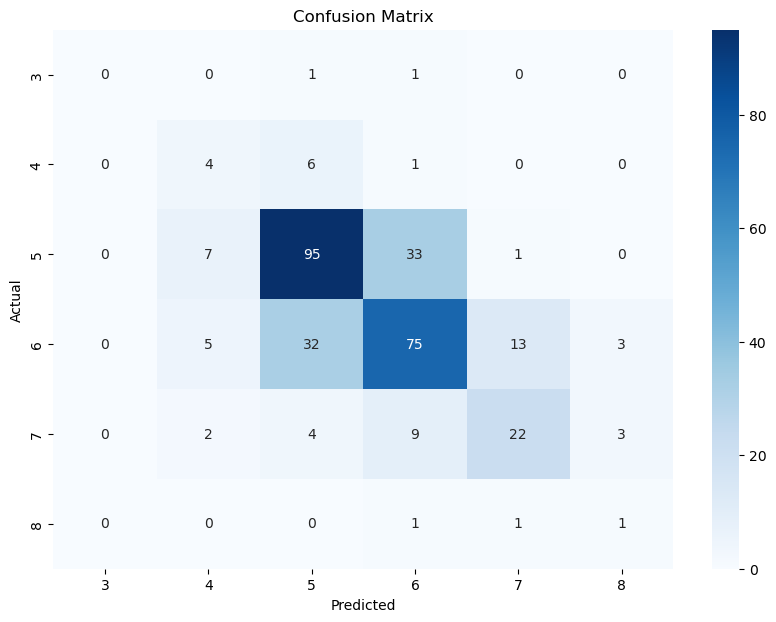

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
